# Minicell Key Numbers

This notebook details analysis of key numbers for the minicells we produce from *E. coli* DS140 using our minicell purification protocol.

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.constants as c

/Users/anton/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


# Morphology

From Adler, et al:
* 10% volume of *E. coli*
* 1 cfu per 10^3—10^4 minicells (1e-3 to 1e-4 purity)

## Diameter 

* *Adler et al* (1966): "Approximately 1/10 the volume". 
* *Jaffe et at* (1988): 0.1–1.2 µm, concentrated at 0.3–0.4 µm.
* *Frazer and Curtiss* (1975): 0.7 µm diameter.
* *Farley et al* (2016): 0.3–0.4 µm (n = 2, from figures). One sample is from a 'skinny' MreB knockout.

![Jaffe1988](Reference/Jaffe 1988 Fig 2.png)
*Jaffe et al (1988) Figure 2*

In [51]:
# Farley
# Figure 1(e)
print "Minicell width 1E:", 205 * (200/90)

# Figure 3(g)
print "Minicell width 3G:", 302 * (100/68)

Minicell width 1E: 410
Minicell width 3G: 302


## Empirical size

In [17]:
lengths = pd.read_table("./Data/Other Induction/Sizes.tab")
ecoli_lengths = pd.read_table("./Data/Other Induction/Sizes.tab")[:18]
minicell_dia = pd.read_table("./Data/Other Induction/Sizes.tab")[18:]

lengths['Type'] = "Ecoli"
lengths.ix[18:,'Type'] = "Minicell"

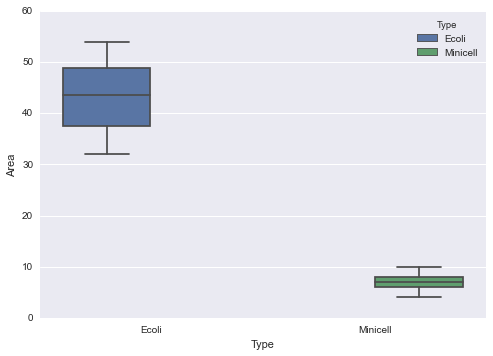

In [18]:
sns.boxplot(x="Type", y="Area", hue="Type", data=lengths)

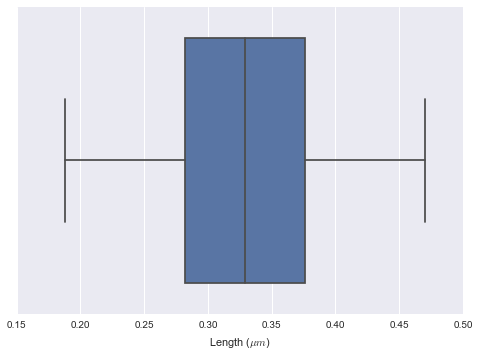

In [21]:
ecoli_length = 2 # µm

conv = ecoli_lengths['Area'].mean() / ecoli_length # px/µm

sns.boxplot(minicell_dia['Area'] / conv)
plt.xlabel("Length ($\mu m$)")

minicell_mean_dia_norm = (minicell_dia['Area'] / conv).mean()

Based on 16 px/µm from EW's calculations:

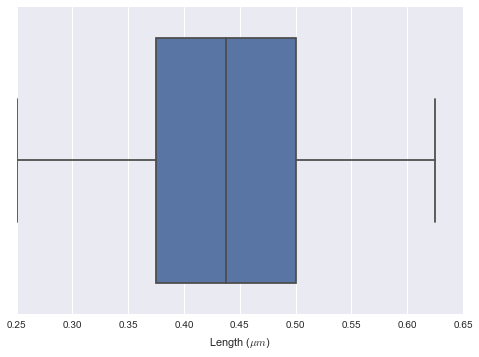

In [20]:
microscope_conv = 16 # px/µm
sns.boxplot(minicell_dia['Area'] / microscope_conv)
plt.xlabel("Length ($\mu m$)")

minicell_mean_dia_calc = (minicell_dia['Area'] / microscope_conv).mean()

In [23]:
print "Minicell mean diameter (ecoli norm): {:.2f} µm".format(minicell_mean_dia_norm)
print "Minicell mean diameter (calculated): {:.2f} µm".format(minicell_mean_dia_calc)

Minicell mean diameter (ecoli norm): 0.32 µm
Minicell mean diameter (calculated): 0.42 µm


In [24]:
minicell_size_range = np.array([0.1, 0.42, 0.8])

## Volume

By spherical volume:

    Dia: 0.20 0.32 0.40 0.70 µm
    Vol: 0.00 0.02 0.03 0.18 µm^3
     SA: 0.13 0.32 0.50 1.54 µm^2

In [27]:
volume = 4. / 3 * np.pi * (minicell_size_range / 2.)**3
sa = 4. * np.pi * (minicell_size_range / 2.)**2

print "Dia: {:.2f} {:.2f} {:.2f} µm".format(*minicell_size_range)
print "Vol: {:.2f} {:.2f} {:.2f} µm^3".format(*volume)
print " SA: {:.2f} {:.2f} {:.2f} µm^2".format(*sa)

Dia: 0.10 0.42 0.80 µm
Vol: 0.00 0.04 0.27 µm^3
 SA: 0.03 0.55 2.01 µm^2


In [43]:
table = pd.DataFrame(columns=['Attribute', 'Low', 'Best', 'High', 'Unit', 'Notes'])
table['Attribute'] = 'Diameter', 'Volume', 'Surface Area'
table['Low'] = [minicell_size_range[0], volume[0], sa[0]]
table['Best'] = [minicell_size_range[1], volume[1], sa[1]]
table['High'] = [minicell_size_range[2], volume[2], sa[2]]
table['Unit'] = ['µm', 'µm^3', 'µm^2']
table['Notes'] = ['','','']
table

,Attribute,Low,Best,High,Unit,Notes
0,Diameter,0.100000,0.420000,0.800000,µm,
1,Volume,0.000524,0.038792,0.268083,µm^3,
2,Surface Area,0.031416,0.554177,2.010619,µm^2,


In [28]:
# From Pratts and de Pedro (1989), BNID 105026
ecoli_sa = pd.DataFrame({"Volume":[0.65, 0.66, 0.62], "SA":[4.42,4.42,4.3]})
(ecoli_sa['SA'] / ecoli_sa['Volume']).mean()

6.8108178559791455

By ratio to *E. coli*:
* 0.1–3.5 µm^3 per *Loferer-Krössbacher et al* (1998); BNID 100003; by TEM and image analysis
* 0.44–1.79 (~1.1) µm^3 per *Kubitschek and Friske* (1986); BNID 100004; by pelleting and Coulter counter

so 0.01–0.35 µm^3.

Use 0.1 µm^3 for simplicity.

In [4]:
minicell_vol = 0.1

# Atoms

## *E. coli*

* Elemental composition of an *E. coli* cell is C4:H7:O2:N1 = 101.104 g/mol. 
* Derived estimate of the number of carbons is 10^10 (BNID 103010): approx 2 x 10^10 atoms overall.
* *E. coli* surface area is ~4.42 µm^2.

## Minicell

Three approaches:
* Van der Waals radius
* Covalent radius
* Composition-based

In [46]:
def vol(x):
    # Multiply by 1e-6 to get units of µm^3
    return 4. / 3. * np.pi * (x * 1e-6)**3

carbon_vanderwaals = 170 # pm
hydrogen_vanderwaals = 120 # pm
oxygen_vanderwaals = 152 # pm
nitrogen_vanderwaals = 155 # pm

vanderwaals_atoms = (minicell_vol * 0.3) / ((
    vol(carbon_vanderwaals) * 4 + 
    vol(hydrogen_vanderwaals) * 7 + 
    vol(oxygen_vanderwaals) * 2 + 
    vol(nitrogen_vanderwaals) )) * 14

print "Van der Waals atoms: {:.2g}".format(vanderwaals_atoms)

Van der Waals atoms: 2.4e+09


In [47]:
carbon_covalent = 69
hydrogen_covalent = 31
oxygen_covalent = 66
nitrogen_covalent = 71
phosphorus_covalent = 107

covalent = (minicell_vol * 0.3) / (
    vol(carbon_covalent) * 4 + 
    vol(hydrogen_covalent) * 7 + 
    vol(oxygen_covalent) * 2 + 
    vol(nitrogen_covalent)) * 14
print "Covalent atoms: {:.2g}".format(covalent)

Covalent atoms: 4.1e+10


In [67]:
neidhardt = pd.read_csv("Reference/Neidhardt1996.csv")

ecoli_dry_weight = 2.8e-13 # g; Neidhardt 1996 Table 1 footnote c
ecoli_composition_mol_mass = 101.104

# Assume E. coli volume is ~1µm^3 and weight scales with volume
# Use best guess for volume
minicell_composition_atoms = ecoli_dry_weight / (1 / volume[1]) * c.N_A / ecoli_composition_mol_mass
minicell_composition_carbon = minicell_composition_atoms / 14. * 4
minicell_composition_hydrogen = minicell_composition_atoms / 14. * 7
minicell_composition_oxygen = minicell_composition_atoms / 14. * 2
minicell_composition_nitrogen = minicell_composition_atoms / 14.

print "Composition atoms: {:.2g}".format(minicell_composition_atoms)
print "Carbon: {:.2g}".format(minicell_composition_carbon)
print "Hydrogen: {:.2g}".format(minicell_composition_hydrogen)
print "Oxygen: {:.2g}".format(minicell_composition_oxygen)
print "Nitrogen: {:.2g}".format(minicell_composition_nitrogen)

Composition atoms: 6.5e+07
Carbon: 1.8e+07
Hydrogen: 3.2e+07
Oxygen: 9.2e+06
Nitrogen: 4.6e+06


In [66]:
1.8e7+3.2e7+9.2e6+4.6e6

63800000.0

In [64]:
table.append(pd.Series(['Total Atoms', 0, ecoli_composition_atoms, covalent, '', 'Excluding water, based on 70% water by volume.'], index=table.columns), ignore_index=True)
table.append(pd.Series(['Carbon', 0, ecoli_composition_atoms, covalent, '', 'Excluding water, based on 70% water by volume.'], index=table.columns), ignore_index=True)

,Attribute,Low,Best,High,Unit,Notes
0,Diameter,0.100000,4.200000e-01,8.000000e-01,µm,
1,Volume,0.000524,3.879239e-02,2.680826e-01,µm^3,
2,Surface Area,0.031416,5.541769e-01,2.010619e+00,µm^2,
3,Total Atoms,0.000000,6.469744e+07,4.083429e+10,,"Excluding water, based on 70% water by volume."


### Summary
* Van der Waals atoms: 2.4e+09
* Covalent atoms: 4.1e+10
* Composition atoms: 1.7e+08
 * Carbon: 4.8e+07
 * Hydrogen: 8.3e+07
 * Oxygen: 2.4e+07
 * Nitrogen: 1.2e+07

# Central Dogma
## DNA

DNA: PO4 + C5H8O2 + N5C5O1H6 = P1N5O7C10H14

In [220]:
dna_covalent = (minicell_vol) / (
    vol(phosphorus_covalent) +
    vol(carbon_covalent) * 10 + 
    vol(hydrogen_covalent) * 14 + 
    vol(oxygen_covalent) * 7 + 
    vol(nitrogen_covalent) * 5)
print "Max DNA (Covalent model): {:.2g} nt ({:,.0f})".format(dna_covalent, dna_covalent)
print "Max DNA (Covalent; wet): {:.2g} nt ({:,.0f})".format(dna_covalent * 0.3, dna_covalent * 0.3)

Max DNA (Covalent model): 2.7e+09 nt (2,734,860,981)
Max DNA (Covalent; wet): 8.2e+08 nt (820,458,294)


* DNA volume 'rule of thumb': 1 nm^3 / base (Physical Biology of the Cell; BNID 103778)

In [116]:
dna_vol_per_base = 1e-9 # µm^3 / base
print "Max DNA (Rule of Thumb): {:.2g} nt".format(minicell_vol / dna_vol_per_base)

Max DNA (Rule of Thumb): 1e+08 nt


DNA in *E. coli* makes up 3.1% dry weight of the cell (Neidhardt 1996). If we assume a similar range for our cell, say 1–10%, we get 1e5 to 1e6 nt: 1 to 10 megabases.

In [218]:
ecoli_genome_size = 4.64 * c.mega
minicell_dna_range = ecoli_genome_size / 10 / 3.1
print "Likely DNA range: {:,.0f}–{:,.0f} nt".format(minicell_dna_range, minicell_dna_range * 10)

Likely DNA range: 149,677–1,496,774 nt


### Phage Calculations

/Users/anton/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


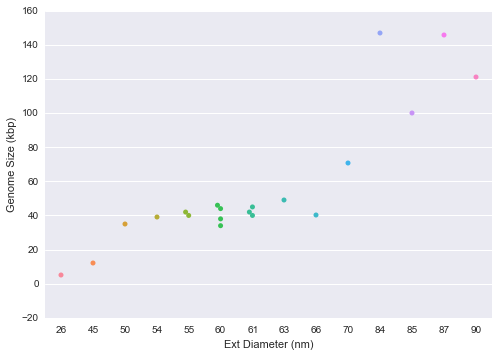

In [5]:
# Based on Jover, Effler, Buchan, Wilhelm and Weitz, The elemental composition of virus particles (1014) Nat Rev Microbiol.

phage_sizes = pd.read_csv("Reference/Jover2014PhageSizes.csv")
#  (x='Genome Size (kbp)', y='Ext Diameter (nm)', hue='Phage', data=phage_sizes)
# phage_sizes.plot.scatter(x='Ext Diameter (nm)', y='Genome Size (kbp)', c='Phage')
sns.swarmplot(x='Ext Diameter (nm)', y='Genome Size (kbp)', data=phage_sizes)

In [14]:
phage_sizes

,Phage,Genome Size (kbp),Ext Diameter (nm),Size ref,Dia ref,Volume
0,Lamda,49,63,NaN,NaN,0.000131
1,Mu,39,54,NaN,NaN,0.000082
2,P1,100,85,NaN,NaN,0.000322
3,P2,34,60,NaN,NaN,0.000113
4,P4,12,45,NaN,NaN,0.000048
5,Phi80,45,61,NaN,NaN,0.000119
6,PhiX174,5,26,NaN,NaN,0.000009
7,T3,38,60,NaN,NaN,0.000113
8,T5,121,90,NaN,NaN,0.000382
9,T7,40,61,NaN,NaN,0.000119


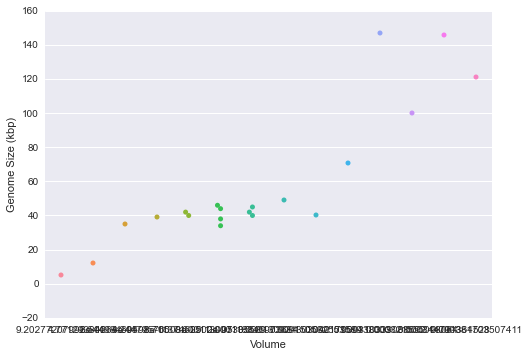

In [13]:
phage_sizes['Volume'] = 4./3. * np.pi * (phage_sizes['Ext Diameter (nm)'] / 2 / 1000)**3 # µm^3
sns.swarmplot(x='Volume', y='Genome Size (kbp)', data=phage_sizes)

In [216]:
phage_dna_per_um = (phage_sizes['Genome Size (kbp)'] * 1000 / phage_sizes['Volume']).mean()
print "DNA per µm^3: {:.2g}".format(phage_dna_per_um)
print "Max DNA in Minicell: {:,.0f} bases".format(phage_dna_per_um * minicell_vol)

DNA per µm^3: 3.9e+08
Max DNA in Minicell: 39,026,639 bases


### Plasmid Segregation
* Measured at ~40% using image analysis
* Need to bulk out data set
* Get complementary measurement with FACS

## RNAP

### *E. coli*
* 1500–11400 per cell (*Bremer and Dennis* 1996; BNID 101440)

### Minicells
* Levels extremely low (*Hurwitz and Gold* 1968)
* Conjugated DNA is not transcribed *Fralick* (1968, 1970)
* But: plasmid-containing cells have RNAP—transported by the plasmid.

* Plasmid-free minicells had 17% of the RNAP beta subunits per total protein (*Shepherd et al* 2001).
* Plasmid-carrying minicells had 20-22% RNAP (*Shepherd*).
* Accords with *Bakshi et al* 2013: 82% of RNAP is bound to DNA specifically or non-specifically.
* *Frazer* reported that the beta subunits alone did not work without plasmid.

In [125]:
print "RNAP without plasmid: {:g}–{:g}".format(*(0.17 * np.array([1500, 11400])))
print "RNAP without plasmid: {:g}–{:g}".format(*(0.22 * np.array([1500, 11400])))

RNAP without plasmid: 255–1938
RNAP without plasmid: 330–2508


Overall 250-2500.

Could we build a plasmid that preferentially transported DNA-associated molecules into the minicells?

### RNA Nucleotides
3.7 x 10^7 to 39 x 10^7 nt / cell per *Bremer and Dennis*. This gives us 3.7 x 10^6 to 3.9 x 10^7 nucleotides, assuming we don't lose to many to asymmetric segregation as they're retained by genome-associated RNAP with nascent transcripts.

Average transcript length in *E. coli*: 1000 nt (Jones et al 2007; BNID 100022). This gives 3700 to 39000 transcripts max per cell, if we don't use RNA for anything else.

*E. coli* has 1380/cell (with 40 min doubling) (Ingraham 1983; 106153). Based on this ratio we could perhaps expect 10x less: ~100.

Organism, mRNA/cell, BNID
S.cerevisiae, 26000-60000, 103023


## Ribosomes

In *E. coli* 6800 to 72000 (*Bremer and Dennis* 1996)

In [68]:
np.array([6800, 72000]) / 10

array([ 680, 7200])

# Amino Acids

5.6e8 to 25e8 amino acids per cell (*Bremer and Dennis* 1996). We get that / 10. With mean transcript length of 1000 nt we have ~333 amino acids, so

In [76]:
np.array([5.6e7, 25e7]) / 300.

array([ 186666.66666667,  833333.33333333])

In [69]:
ecoli_aas = pd.DataFrame({
    "Name":['Ala', 'Arg', 'Asn', 'Asp', 'Cys', 'Glu', 'Gln', 'Gly',
           'His','Ile','Leu','Lys','Met','Phe','Pro','Ser','Thr',
           'Trp','Tyr','Val'], 
    "Number": np.array([
            9.3e7,
            5.3e7,
            4.4e7,
            4.4e7,
            1.7e7,
            4.8e7,
            4.8e7,
            1.1e8,
            1.7e7,
            5.2e7, 8.1e7, 6.2e7,
            2.8e7,
            3.2e7,
            4.0e7, 3.9e7,
            4.6e7, 1.0e7, 2.5e7, 7.6e7
        ])})

minicell_aas = ecoli_aas.copy()
minicell_aas.loc[:,'Number'] = minicell_aas['Number'] / 10

In [71]:
ecoli_aas['Number'].sum()

965000000.0

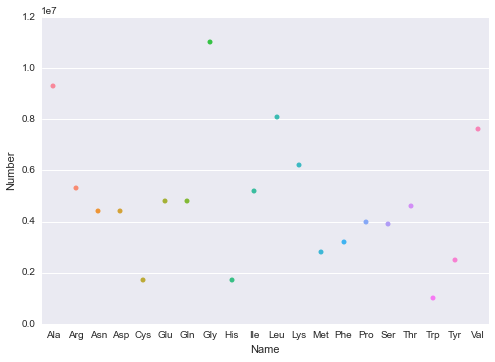

In [158]:
sns.stripplot(x="Name", y="Number", data=minicell_aas)

*Kaleta et al* 2013; BNID 110093

In [ ]:
ecoli_mean_protein_length = 325 # amino acids; Dill et al, BNID 108986


# Energy

* Minicells at 37ºC showed a decrease in respiration to 50% over two days.
* At 4ºC 10% drop over 7 days.
* Ribonuclease activity dropped to 54-58% after 8 h.
* Kool (1984) reported 80% drop in capacity to synthesize RNA and protein after 2 days at 2ºC.

(*Frazer and Curtiss* 1975)

# Next Steps
* Tie in to pathway requirements
* Map specific proteins / molecules to our estimates
* What's most useful?

# Current Topics...

## Size
* Average dimensions are 0.7 µm diameter versus 2.8x0.83 for cells.
* Surface to volume ratio 1.5 that of cells.

## Energy
* Minicells at 37ºC showed a decrease in respiration to 50% over two days.
* At 4ºC 10% drop over 7 days.
* Ribonuclease activity dropped to 54-58% after 8 h.
* Kool (1984) reported 80% drop in capacity to synthesize RNA and protein after 2 days at 2ºC.

## Macromolecules
* RNA:
 * 0.36 mg/mg protein *Adler 1967*
 * 52 mg/g wet weight *Michaels and Tchen 1968*
 * 0.43 mg/mg protein *Black 1967*; *Silverman 1967*
* RNAP:
 * Levels extremely low (*Hurwitz and Gold* 1968)
 * Conjugated DNA is not transcribed *Fralick* (1968, 1970)
 * But: plasmid-containing cells have RNAP—transported by the plasmid.

# Table